In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
# import tabulate as tab
# import dython as dt
# from tabulate import tabulate
from pandas.plotting import scatter_matrix
# from dython.nominal import associations

In [15]:
df = pd.read_csv('XY_train.csv',encoding='latin-1')
df.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,13163,city_16,0.910,NaN,No relevent experience,no_enrollment,High School,NaN,2,NaN,NaN,never,16,1
1,9357,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,6,1000-4999,Pvt Ltd,1,262,0
2,604,city_16,0.910,Male,No relevent experience,NaN,NaN,NaN,3,NaN,NaN,never,24,0
3,19033,city_16,0.910,Male,No relevent experience,no_enrollment,High School,NaN,3,NaN,NaN,1,35,0
4,4825,city_145,0.555,Male,Has relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,1,43,1


In [16]:
y_train = df["target"]
y_train

0        1
1        0
2        0
3        0
4        1
        ..
15321    1
15322    0
15323    1
15324    0
15325    0
Name: target, Length: 15326, dtype: int64

# Pre-processing

In [17]:
df.city = df.city.str.slice(start=5)
df["gender"] = df["gender"].fillna("unknown")
df["company_size"] = df["company_size"].fillna("unknown")
df["company_type"] = df["company_type"].fillna("unknown")
print(df["enrolled_university"].mode())
df["enrolled_university"] = df["enrolled_university"].fillna("no_enrollment")
print(df["major_discipline"].mode())
df["major_discipline"] = df["major_discipline"].fillna("STEM")
print(df["last_new_job"].mode())
df["last_new_job"] = df["last_new_job"].fillna("1")
print(df["education_level"].mode())
df["education_level"] = df["education_level"].fillna("Graduate")

0    no_enrollment
dtype: object
0    STEM
dtype: object
0    1
dtype: object
0    Graduate
dtype: object


In [18]:
print(df["experience"].unique())
df["experience"] = df["experience"].replace("<1","1")
df["experience"] = df["experience"].replace(">20","20")
df["experience"] = pd.to_numeric(df["experience"])
print(df["experience"].unique())
print(df["experience"].mode())
df["experience"] = df["experience"].fillna(20)
print(df["experience"].value_counts())
bins = [0,5,9,15,20]
labels = ["low", "low-middle", "middle-high", "high"]
df["experience"] = pd.cut(df["experience"], bins= bins, labels= labels)
print(df["experience"].value_counts())

## experience
df["experience"] = df["experience"].replace("low",0)
df["experience"] = df["experience"].replace("low-middle",1)
df["experience"] = df["experience"].replace("middle-high",2)
df["experience"] = df["experience"].replace("high",3)

df.experience= df.experience.astype(int)

['2' '6' '3' '4' '>20' '13' '19' '10' '1' '5' '7' '20' '14' '16' '12' '15'
 '8' '<1' '17' '9' '11' '18' nan]
[ 2.  6.  3.  4. 20. 13. 19. 10.  1.  5.  7. 14. 16. 12. 15.  8. 17.  9.
 11. 18. nan]
0    20.0
dtype: float64
20.0    2783
5.0     1161
4.0     1097
3.0     1084
6.0      979
2.0      889
1.0      841
7.0      825
9.0      804
10.0     789
8.0      636
15.0     572
11.0     525
14.0     478
16.0     403
12.0     393
13.0     313
17.0     282
19.0     249
18.0     223
Name: experience, dtype: int64
low            5072
high           3940
low-middle     3244
middle-high    3070
Name: experience, dtype: int64


# Featurs epresentation

### Binary Variable

In [19]:
df.relevent_experience[df.relevent_experience=='No relevent experience'] = 0
df.relevent_experience[df.relevent_experience=='Has relevent experience'] = 1
df.relevent_experience = df.relevent_experience.astype(int)

C:\Users\user\AppData\Local\Temp/ipykernel_14588/1523922599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.relevent_experience[df.relevent_experience=='No relevent experience'] = 0
C:\Users\user\AppData\Local\Temp/ipykernel_14588/1523922599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.relevent_experience[df.relevent_experience=='Has relevent experience'] = 1


### LabelEncoder - Order is important

In [6]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [20]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
cols = ["education_level", "experience", "last_new_job", "company_size", "enrolled_university"]

## education_level
encoder= ce.OrdinalEncoder(cols=['education_level'],return_df=True,
                           mapping=[{'col':'education_level',
'mapping':{'Primary':0,'High school':1,'Graduate':2,'Masters':3,'Phd':4,}}])
df['education_level'] = encoder.fit_transform(df['education_level'])
df["education_level"] = df["education_level"].replace(-1,1)

## enrolled_university
encoder= ce.OrdinalEncoder(cols=['enrolled_university'],return_df=True,
                           mapping=[{'col':'enrolled_university',
'mapping':{'no_enrollment':0,'Part time course':1,'Full time course':2,}}])
df['enrolled_university'] = encoder.fit_transform(df['enrolled_university'])

## last_new_job
encoder= ce.OrdinalEncoder(cols=['last_new_job'],return_df=True,
                           mapping=[{'col':'last_new_job',
'mapping':{'never':0,'1':1,'2':2,'3':3,'4':4,'>4':5}}])
df['last_new_job'] = encoder.fit_transform(df['last_new_job'])

## company_size
encoder= ce.OrdinalEncoder(cols=['company_size'],return_df=True,
                           mapping=[{'col':'company_size',
'mapping':{'unknown':0,'<10':1,'10-49':2,'50-99':3,'100-500':4,'500-1K':5,'1K-5K':6,'5K-10K':7,'10K+':8}}])
df['company_size'] = encoder.fit_transform(df['company_size'])

### Get Dummies - Order is Not important

In [22]:
## gender
encoder=ce.OneHotEncoder(cols='gender',return_df=True,use_cat_names=True)
df_encoded = encoder.fit_transform(df.gender)
df = pd.concat([df, df_encoded], axis=1)
df = df.drop(columns="gender")
df.head(10)

## major_discipline
encoder=ce.OneHotEncoder(cols='major_discipline',return_df=True,use_cat_names=True)
df_encoded = encoder.fit_transform(df.major_discipline)
df = pd.concat([df, df_encoded], axis=1)
df = df.drop(columns="major_discipline")

## company_type
encoder=ce.OneHotEncoder(cols='company_type',return_df=True,use_cat_names=True)
df_encoded = encoder.fit_transform(df.company_type)
df = pd.concat([df, df_encoded], axis=1)
df = df.drop(columns="company_type")

### Standardization of continuous Variables

In [23]:
from sklearn.preprocessing import StandardScaler

features = ['city_development_index','training_hours']
df[features] = StandardScaler().fit_transform(df[features])
x_train = df.drop(columns =["enrollee_id", "city","target"])
# df_y = df["target"]

In [24]:
x_train, y_train

(       city_development_index  relevent_experience  enrolled_university  \
 0                    0.657186                    0                    0   
 1                    0.551630                    1                    0   
 2                    0.657186                    0                    0   
 3                    0.657186                    0                    0   
 4                   -2.225316                    1                    2   
 ...                       ...                  ...                  ...   
 15321                0.738384                    0                    0   
 15322                0.299919                    0                    2   
 15323                0.519151                    1                    0   
 15324               -1.665055                    0                    2   
 15325                0.299919                    1                    0   
 
        education_level  experience  company_size  last_new_job  \
 0                 

# Featurs Selection

### 1. Filter Method - Information Gain

<AxesSubplot:>

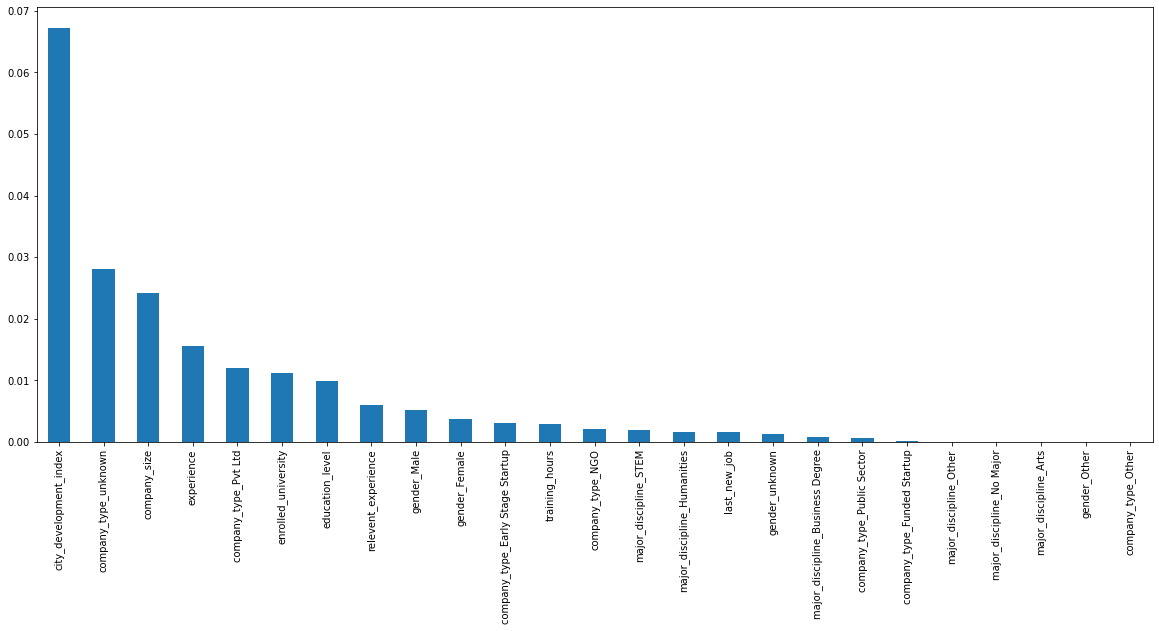

In [26]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))
print(mutual_info.sort_values(ascending=False))

In [27]:
print(mutual_info.sort_values(ascending=False))

city_development_index              0.067271
company_type_unknown                0.028029
company_size                        0.024246
experience                          0.015519
company_type_Pvt Ltd                0.011988
enrolled_university                 0.011165
education_level                     0.009870
relevent_experience                 0.005928
gender_Male                         0.005207
gender_Female                       0.003761
company_type_Early Stage Startup    0.003079
training_hours                      0.002891
company_type_NGO                    0.002028
major_discipline_STEM               0.001878
major_discipline_Humanities         0.001663
last_new_job                        0.001529
gender_unknown                      0.001277
major_discipline_Business Degree    0.000715
company_type_Public Sector          0.000676
company_type_Funded Startup         0.000172
major_discipline_Other              0.000000
major_discipline_No Major           0.000000
major_disc

In [28]:
lables  = ["major_discipline_Other", "major_discipline_No Major", "major_discipline_Arts", "gender_Other", "company_type_Other"]
x_train = x_train.drop(columns = lables)

In [35]:
lables = [11801, 15326]
x_train = x_train.drop(index = lables)

KeyError: '[15326] not found in axis'

#### Select Best 5 Featurs

In [28]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=15)
sel_five_cols.fit(df_x, df_y)
best = df_x.columns[sel_five_cols.get_support()]
x_train = df[best]
x_train.head()

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,gender_unknown,gender_Male,gender_Female,major_discipline_STEM,company_type_unknown,company_type_Pvt Ltd,company_type_NGO
0,0.657186,0,0,1.0,0,0.0,0,-0.822220,1,0,0,1,1,0,0
1,0.551630,1,0,3.0,1,-1.0,1,3.277426,0,1,0,1,0,1,0
2,0.657186,0,0,2.0,0,0.0,0,-0.688898,0,1,0,1,1,0,0
3,0.657186,0,0,1.0,0,0.0,1,-0.505581,0,1,0,1,1,0,0
4,-2.225316,1,2,2.0,0,0.0,1,-0.372259,0,1,0,1,1,0,0


### 2. Wrrapers Method - SFS

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
# from sklearn.linear_model import LogisticRegression as LGR
lgr_m = LGR(random_state=0).fit(df_x, df_y)
sfs_selector = SFS(estimator=lgr_m, n_features_to_select = 5, cv =10, direction ="forward")
sfs_selector.fit(df_x, df_y)
df_x.columns[sfs_selector.get_support()]

### PCA - not relevent now

# Spilt for train and test sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.23, random_state=42)

In [36]:
print(f"Train size: {X_train.shape[0]}")
print(f"Test size: {X_test.shape[0]}")
print("Train\n-----------\n", pd.value_counts(Y_train)/y_train.shape[0])
print("\nTest\n-----------\n", pd.value_counts(y_test)/y_test.shape[0])

Train size: 11801
Test size: 3525
Train
-----------
 0    0.750424
1    0.249576
Name: target, dtype: float64


NameError: name 'y_test' is not defined

# Model Training

## 1. Decision Tree (DT)

In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score

In [30]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

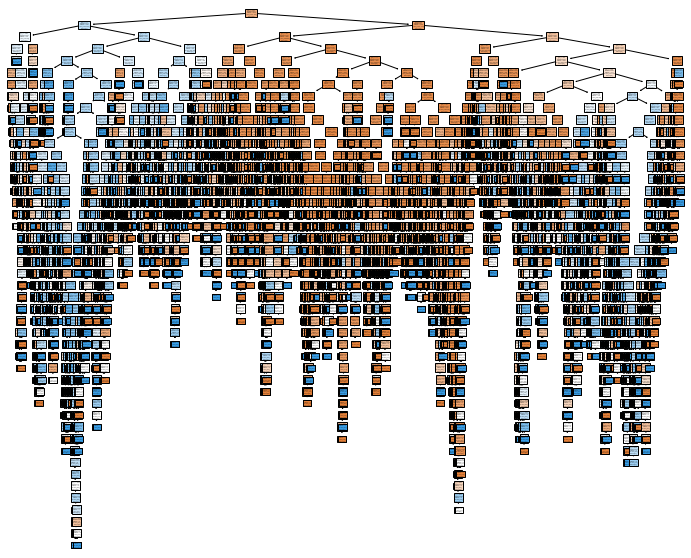

In [31]:
plt.figure(figsize=(12, 10))
plot_tree(model, filled=True, class_names=True)
plt.show()

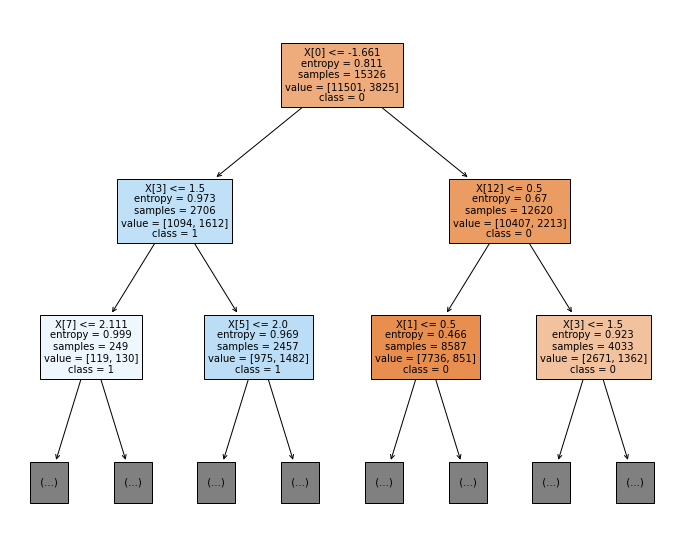

In [33]:
plt.figure(figsize=(12, 10))
plot_tree(model, filled=True, max_depth=2, class_names=['0', '1'], fontsize=10)
plt.show()

## Accuracy test - & Evaluation

### Balanced data

In [35]:
print(f"Accuracy: {accuracy_score(y_true=y_train, y_pred=model.predict(x_train)):.2f}")

Accuracy: 1.00


### Unbalanced data

In [ ]:
print("Roc_Auc_Score:",roc_auc_score(y_test, model.predict(X_test)))

## Hyperparameter tuning 

### Baseline

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)
print("Roc_Auc_Score:",roc_auc_score(y_train, model.predict(X_test)))
print("Roc_Auc_Score:",roc_auc_score(y_test, model.predict(X_test)))

### Tune max_depth

In [ ]:
# According to the number of featurs
max_depth_list = np.arange(1, 15, 3)

In [ ]:
res = pd.DataFrame()
for max_depth in max_depth_list:
    model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    res = res.append({'max_depth': max_depth,
                      'train_acc':accuracy_score(y_train, model.predict(X_train)),
                      'test_acc':accuracy_score(y_test, model.predict(X_test))}, ignore_index=True)

In [ ]:
plt.figure(figsize=(13, 4))
plt.plot(res['max_depth'], res['train_acc'], marker='o', markersize=4)
plt.plot(res['max_depth'], res['test_acc'], marker='o', markersize=4)
plt.legend(['Train accuracy', 'Test accuracy'])
plt.show()

# 2. ANN

MLP is scale sensitive, hence we have to normalize or standardize the input

In [14]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(x_train)

ValueError: could not convert string to float: '>20'

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.23, random_state=42)

In [89]:
print(f"Train size: {X_train.shape[0]}")
print(f"Test size: {X_test.shape[0]}")
print("Train\n-----------\n", pd.value_counts(Y_train)/Y_train.shape[0])
print("\nTest\n-----------\n", pd.value_counts(Y_test)/Y_test.shape[0])

Train size: 11801
Test size: 3525
Train
-----------
 0    0.748581
1    0.251419
Name: target, dtype: float64

Test
-----------
 0    0.756596
1    0.243404
Name: target, dtype: float64


In [31]:
from sklearn.neural_network import MLPClassifier

In [90]:
model_MLP = MLPClassifier(random_state=1,
                      hidden_layer_sizes=(10),
                      max_iter=1000,
                      activation='relu',
                      learning_rate_init=0.001)
model_MLP.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=10, max_iter=1000, random_state=1)

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [91]:
print(f"Accuracy: {accuracy_score(y_true=Y_train, y_pred=model_MLP.predict(X_train)):.3f}")
print(confusion_matrix(y_true=Y_train, y_pred=model_MLP.predict(X_train)))

Accuracy: 0.790
[[8067  767]
 [1706 1261]]


In [94]:
from sklearn.metrics import roc_auc_score
print("Roc_Auc_Score:",roc_auc_score(Y_train, model.predict(X_train)))

Roc_Auc_Score: 0.6946675104513547


In [95]:
print("Roc_Auc_Score:",roc_auc_score(Y_test, model.predict(X_test)))

Roc_Auc_Score: 0.6446434143284537


Tune the number of layers and neurons at each layer

In [47]:
train_accs = []
test_accs = []
for size_ in range(1, 50, 2):
    print(f"size: {size_}")
    model = MLPClassifier(random_state=1,
                          hidden_layer_sizes=(size_, size_),
                          max_iter=100,
                          activation='relu',
                          verbose=False,
                          learning_rate_init=0.001,
                          alpha=0.00)
    model.fit(X_train, Y_train)
    train_acc = model.score(X_train, Y_train)
    train_accs.append(train_acc)
    test_acc = model.score(X_test, Y_test)
    test_accs.append(test_acc)

size: 1
size: 3


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 5


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 7


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 9


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 11


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 13


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 15


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 17


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 19


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 21


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 23


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 25


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 27


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 29


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 31


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 33


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 35


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 37


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 39
size: 41


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 43


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 45


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 47


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 49


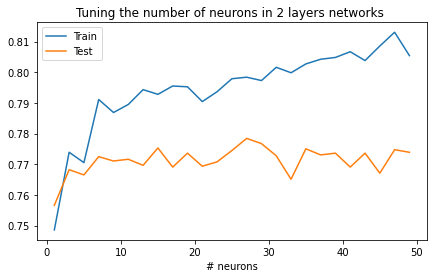

In [48]:
plt.figure(figsize=(7, 4))
plt.plot(range(1, 50, 2), train_accs, label='Train')
plt.plot(range(1, 50, 2), test_accs, label='Test')
plt.legend()
plt.xlabel('# neurons')
plt.title('Tuning the number of neurons in 2 layers networks ')
plt.show()

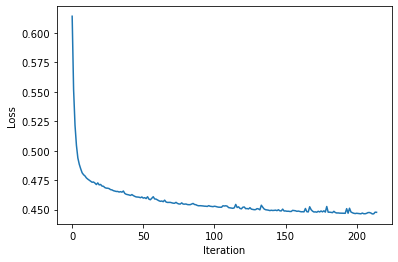

In [50]:
plt.plot(model_MLP.loss_curve_)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

## Hyper parameter Tuning - GridSearchCV

In [77]:
from sklearn.model_selection import GridSearchCV


In [84]:
parameters = {
            "random_state" : [1],
            "activation" : ["logistic" , "relu"]    ,
            "solver" : ['sgd'],
            "hidden_layer_sizes" :(range(1, 15, 2), range(1, 15, 2)),
            "alpha" :[0.0001],
            'learning_rate': ['constant'],   
    }
clf = GridSearchCV(MLPClassifier(), parameters)
clf.fit(X_train, Y_train)

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'], 'alpha': [0.0001],
                         'hidden_layer_sizes': (range(1, 15, 2),
                                                range(1, 15, 2)),
                         'learning_rate': ['constant'], 'random_state': [1],
                         'solver': ['sgd']})

In [85]:
print(clf.score(X_train, Y_train))
print(clf.best_params_)

0.7485806287602745
{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': range(1, 15, 2), 'learning_rate': 'constant', 'random_state': 1, 'solver': 'sgd'}


In [86]:
clf.cv_results_
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_random_state,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.472268,0.013914,0.003226,0.003952,logistic,0.0001,"(1, 3, 5, 7, 9, 11, 13)",constant,1,sgd,"{'activation': 'logistic', 'alpha': 0.0001, 'h...",0.748412,0.748729,0.748729,0.748729,0.748305,0.748581,0.000185,1
1,0.461387,0.008002,0.003310,0.004057,logistic,0.0001,"(1, 3, 5, 7, 9, 11, 13)",constant,1,sgd,"{'activation': 'logistic', 'alpha': 0.0001, 'h...",0.748412,0.748729,0.748729,0.748729,0.748305,0.748581,0.000185,1
2,0.409097,0.008568,0.001603,0.003206,relu,0.0001,"(1, 3, 5, 7, 9, 11, 13)",constant,1,sgd,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.748412,0.748729,0.748729,0.748729,0.748305,0.748581,0.000185,1
3,0.405616,0.011807,0.004229,0.004363,relu,0.0001,"(1, 3, 5, 7, 9, 11, 13)",constant,1,sgd,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.748412,0.748729,0.748729,0.748729,0.748305,0.748581,0.000185,1


In [87]:
df[['param_activation','param_solver','param_hidden_layer_sizes','param_alpha','mean_test_score']]

,param_activation,param_solver,param_hidden_layer_sizes,param_alpha,mean_test_score
0,logistic,sgd,"(1, 3, 5, 7, 9, 11, 13)",0.0001,0.748581
1,logistic,sgd,"(1, 3, 5, 7, 9, 11, 13)",0.0001,0.748581
2,relu,sgd,"(1, 3, 5, 7, 9, 11, 13)",0.0001,0.748581
3,relu,sgd,"(1, 3, 5, 7, 9, 11, 13)",0.0001,0.748581


#### The model with the best parameters

In [97]:
model_MLP = MLPClassifier(random_state=1,
                      hidden_layer_sizes=(10),
                      max_iter=1000,
                      solver = "sgd",
                      activation='logistic',
                      learning_rate_init=0.001)
model_MLP.fit(X_train, Y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=10, max_iter=1000,
              random_state=1, solver='sgd')

In [98]:
print(confusion_matrix(y_true=Y_train, y_pred=model_MLP.predict(X_train)))

[[8151  683]
 [2006  961]]


In [100]:
print("Roc_Auc_Score for train_set:",roc_auc_score(Y_train, model_MLP.predict(X_train)))
print("Roc_Auc_Score for val_set:",roc_auc_score(Y_test, model_MLP.predict(X_test)))

Roc_Auc_Score for train_set: 0.6232906359052284
Roc_Auc_Score for val_set: 0.6054208258932667


###  Hyper parameter Tuning  - for each parameter in separate

#### Tuning hidden_layer_sizes

In [ ]:
train_accs = []
test_accs = []
for size_ in range(1, 50, 2):
    print(f"size: {size_}")
    model = MLPClassifier(random_state=1,
                          hidden_layer_sizes=(size_, size_),
                          max_iter=100,
                          activation='relu',
                          verbose=False,
                          learning_rate_init=0.001,
                          alpha=0.00)
    model.fit(X_train, Y_train)
    train_acc = model.score(X_train, Y_train)
    train_accs.append(train_acc)
    test_acc = model.score(X_test, Y_test)
    test_accs.append(test_acc)

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(range(1, 50, 2), train_accs, label='Train')
plt.plot(range(1, 50, 2), test_accs, label='Test')
plt.legend()
plt.xlabel('# neurons')
plt.title('Tuning the number of neurons in 2 layers networks ')
plt.show()

#### Tuning  max_iter

In [ ]:
train_accs = []
test_accs = []
for max_iter_ in [100, 200, 300, 400, 500]:
    print(f"size: {size_}")
    model = MLPClassifier(random_state=1,
                          hidden_layer_sizes=(size_, size_),
                          max_iter= max_iter_,
                          activation=[act]
                          verbose=False,
                          learning_rate_init=0.001,
                          alpha=0.00)
    model.fit(X_train, Y_train)
    train_acc = model.score(X_train, Y_train)
    train_accs.append(train_acc)
    test_acc = model.score(X_test, Y_test)
    test_accs.append(test_acc)

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(range(1, 50, 2), train_accs, label='Train')
plt.plot(range(1, 50, 2), test_accs, label='Test')
plt.legend()
plt.xlabel('# neurons')
plt.title('Tuning the number of neurons in 2 layers networks ')
plt.show()

#### Tuning solver

In [ ]:
train_accs = []
test_accs = []
for solver_ in ["sgd", ""]:
    print(f"size: {size_}")
    model = MLPClassifier(random_state=1,
                          hidden_layer_sizes=(size_, size_),
                          max_iter=100,
                          activation=[act],
                          solver = solver_
                          verbose=False,
                          learning_rate_init=0.001,
                          alpha=0.00)
    model.fit(X_train, Y_train)
    train_acc = model.score(X_train, Y_train)
    train_accs.append(train_acc)
    test_acc = model.score(X_test, Y_test)
    test_accs.append(test_acc)

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(range(1, 50, 2), train_accs, label='Train')
plt.plot(range(1, 50, 2), test_accs, label='Test')
plt.legend()
plt.xlabel('# neurons')
plt.title('Tuning the number of neurons in 2 layers networks ')
plt.show()

#### Tuning activation

In [ ]:
train_accs = []
test_accs = []
for act_ in ["relu", "logistic"]:
    print(f"size: {size_}")
    model = MLPClassifier(random_state=1,
                          hidden_layer_sizes=(size_, size_),
                          max_iter=100,
                          activation=[act]
                          verbose=False,
                          learning_rate_init=0.001,
                          alpha=0.00)
    model.fit(X_train, Y_train)
    train_acc = model.score(X_train, Y_train)
    train_accs.append(train_acc)
    test_acc = model.score(X_test, Y_test)
    test_accs.append(test_acc)

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(range(1, 50, 2), train_accs, label='Train')
plt.plot(range(1, 50, 2), test_accs, label='Test')
plt.legend()
plt.xlabel('# neurons')
plt.title('Tuning the number of neurons in 2 layers networks ')
plt.show()

#### Tuning learning_rate_init

In [ ]:
train_accs = []
test_accs = []
for learning_rare_ in [0.001, 0.05, 0.01, 0.1]:
    print(f"size: {size_}")
    model = MLPClassifier(random_state=1,
                          hidden_layer_sizes=(size_, size_),
                          max_iter=100,
                          activation=[act]
                          verbose=False,
                          learning_rate_init= learning_rare_,
                          alpha=0.00)
    model.fit(X_train, Y_train)
    train_acc = model.score(X_train, Y_train)
    train_accs.append(train_acc)
    test_acc = model.score(X_test, Y_test)
    test_accs.append(test_acc)

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(range(1, 50, 2), train_accs, label='Train')
plt.plot(range(1, 50, 2), test_accs, label='Test')
plt.legend()
plt.xlabel('# neurons')
plt.title('Tuning the number of neurons in 2 layers networks ')
plt.show()